# Bayesian Estimation Example
This notebook demonstrates Bayesian estimation of a normal distribution's mean and standard deviation. We will generate synthetic data, define prior distributions, and compute the posterior distributions for the parameters.

## Importing Required Libraries
We need `numpy` for numerical computations, `matplotlib.pyplot` for visualization, and `scipy` for special functions used in probability distributions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy


## Generating Example Data
We generate 100 data points sampled from a normal distribution with a true mean of 5 and a standard deviation of 1.

In [2]:
np.random.seed(123)
true_mean = 5
data = np.random.normal(loc=true_mean, scale=1, size=100)

## Defining Prior Distributions
We assume a normal prior for the mean with mean 0 and standard deviation 10. The standard deviation's prior is scaled by 1.

In [8]:
prior_mean_mu = 0
prior_mean_sd = 5
prior_sd_scale = 1

## Defining the Likelihood Function
The likelihood function is the probability of observing the data given the mean and standard deviation.

In [9]:
def likelihood(data, mean, sd):
    return np.prod(np.exp(-0.5 * ((data - mean) / sd) ** 2) / (np.sqrt(2 * np.pi) * sd))

## Computing the Posterior Distribution
The posterior distribution is updated based on the observed data. We compute posterior parameters for the mean and standard deviation.

In [10]:
def posterior(data, prior_mean_mu, prior_mean_sd, prior_sd_scale):
    posterior_mean_sd = 1 / np.sqrt(1 / prior_mean_sd ** 2 + len(data) / prior_sd_scale ** 2)
    posterior_mean_mu = posterior_mean_sd ** 2 * (prior_mean_mu / prior_mean_sd ** 2 + np.sum(data) / prior_sd_scale ** 2)
    posterior_sd_df = len(data) - 1
    posterior_sd_scale = np.sqrt(np.sum((data - posterior_mean_mu) ** 2) / posterior_sd_df)
    return posterior_mean_mu, posterior_mean_sd, posterior_sd_scale, posterior_sd_df

posterior_mean_mu, posterior_mean_sd, posterior_sd_scale, posterior_sd_df = posterior(data, prior_mean_mu, prior_mean_sd, prior_sd_scale)

## Plotting Posterior Distributions
We visualize the posterior distributions for the mean and standard deviation.

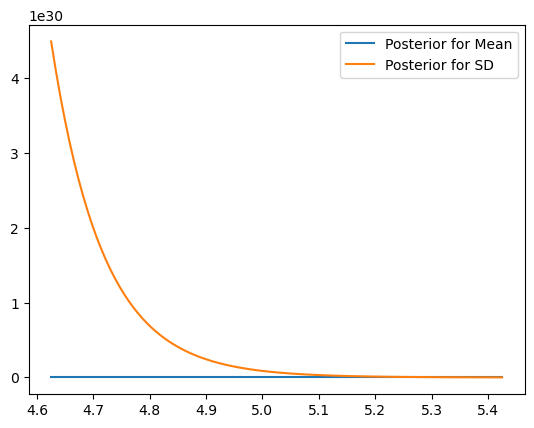

In [11]:
x = np.linspace(posterior_mean_mu - 4 * posterior_mean_sd, posterior_mean_mu + 4 * posterior_mean_sd, 100)
posterior_mean = np.exp(-0.5 * (x - posterior_mean_mu) ** 2 / posterior_mean_sd ** 2) / (np.sqrt(2 * np.pi) * posterior_mean_sd)
posterior_sd = posterior_sd_scale ** posterior_sd_df / (
    np.power(x, posterior_sd_df / 2) * np.exp(posterior_sd_df / 2 * np.log(posterior_sd_scale) + np.log(np.sqrt(2 * np.pi) * x) - np.log(scipy.special.gamma(posterior_sd_df / 2))))

plt.plot(x, posterior_mean, label='Posterior for Mean')
plt.plot(x, posterior_sd, label='Posterior for SD')
plt.legend()
plt.show()

## Bayesian Estimation using PyMC3 (Commented Out)
This section provides an alternative implementation using PyMC3 for Markov Chain Monte Carlo (MCMC) sampling.
If you have PyMC3 installed, you can uncomment and run this section.

In [7]:
# import pymc3 as pm
# with pm.Model() as model:
#     mean = pm.Normal('mean', mu=0, sd=10)
#     sd = pm.HalfNormal('sd', sd=1)
#     obs = pm.Normal('obs', mu=mean, sd=sd, observed=data)
#     trace = pm.sample(1000, tune=1000)
# pm.plot_posterior(trace, var_names=['mean', 'sd'], credible_interval=0.95)
# plt.show()